911 Calls Capstone Project Edureka

911 calls data available:https://www.kaggle.com/mchirico/montcoalert

Data volume & Description-Approx 260K  records –file 911.csv

The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)
I have done some modifications in dataset to make it suitable for EDA.

Converted lat,lng,zip columns to numerical format.
I have not used all the entries from the original dataset.

# Downloaded the data from above url: (File saved as 911calls.csv on my machine)

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Aarav\Desktop\911calls.csv')

In [40]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        266543 non-null  float64
 1   lng        266543 non-null  float64
 2   desc       266543 non-null  object 
 3   zip        234049 non-null  float64
 4   title      266543 non-null  object 
 5   timeStamp  266543 non-null  object 
 6   twp        266448 non-null  object 
 7   addr       266543 non-null  object 
 8   e          266543 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB


# Q1>Compute--What are the top 10 Zipcodes for 911 &Question 1: Are Zipcodes 19446 and 19090 presents?

In [39]:
print(df['zip'].value_counts().head(10))

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64


# Q2> i) What are the top 4 townships (twp) for 911 calls & 
# ii) Which of the following township are not present? --LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

In [6]:
df['twp'].value_counts().head(4)

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64

# Q3> What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [43]:
reason_list=[]
for i in df['title'].str.split(":"):
    reason_list.append(i)
reason_list2=[]
for i in reason_list:
    reason_list2.append(i[0])

df['reason'] = reason_list2
df['reason'].value_counts().head(2)   

EMS        133234
Traffic     93400
Name: reason, dtype: int64

# Q4 > Compute --Plot barchart using matplot for911 calls by Reason & Question 4: How can you plot the bars horizontally?

<AxesSubplot:ylabel='reason'>

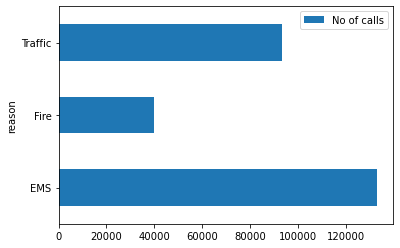

In [44]:
reason_list=[]
for i in df['title'].str.split(":"):
    reason_list.append(i)
reason_list2=[]
for i in reason_list:
    reason_list2.append(i[0])

count_reasons={}
x =0

for i in reason_list2:
     if i not in count_reasons:           
            count_reasons[i] = reason_list2.count(i)           
df2 = pd.DataFrame(count_reasons.items())
df2.columns=['reason', 'No of calls']
df2.plot.barh(x='reason', y='No of calls')           


# Q5> Do Data Manipulation : Which day got maximum calls for EMS and how many?


In [42]:
reason_list=[]
for i in df['title'].str.split(":"):
    reason_list.append(i)
reason_list2=[]
for i in reason_list:
    reason_list2.append(i[0])
df['reason'] = reason_list2
df['Date'] = pd.to_datetime(df['timeStamp']) ## Converted string to timestamp format
df['Day'] = df['Date'].dt.day_name() ## Picking only day from the date
df.groupby(['reason','Day'])['reason'].count().head(1)

reason  Day   
EMS     Friday    19938
Name: reason, dtype: int64

# Q6> Compute --Create a countplot of the Day of Week column with the hue based of the Reason column & Question : On which day traffic calls were lowest?

reason       EMS  Fire  Traffic
Day                            
Friday     19938  5823    14945
Monday     19389  5817    13797
Saturday   18229  5464    11524
Sunday     17384  5204     8847
Thursday   19297  5767    14613
Tuesday    19575  5846    14867
Wednesday  19422  5988    14807


<Figure size 864x576 with 0 Axes>

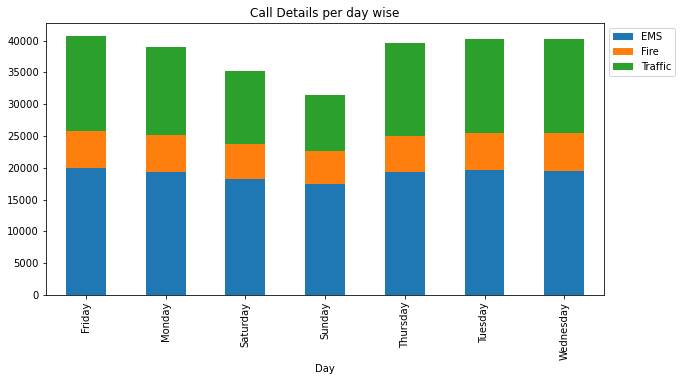

<Figure size 864x576 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
df_grouped = df.groupby(['Day','reason'])['Day'].count().unstack('reason')
print(df_grouped)
df_grouped.plot.bar(stacked=True, figsize=(10,5), title='Call Details per day wise' )
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(12, 8))

# Q7> Create a countplot month wise --Question : Which month saw highest calls for fire?

reason       EMS  Fire  Traffic
Month                          
April      11464  3331     7548
August     11887  3769     8001
December    9922  2941     7215
February   10830  3330     7503
January    12145  3562     8994
July       12003  3652     8201
June       11750  3773     8542
March      11745  3223     7775
May        11678  3243     8172
November    6378  1928     4924
October    11802  3668     8643
September  11630  3489     7882


<Figure size 2160x1080 with 0 Axes>

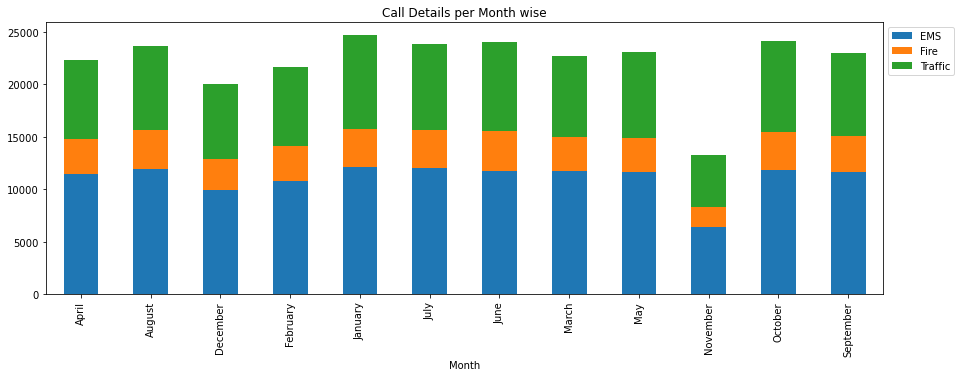

<Figure size 2160x1080 with 0 Axes>

In [48]:
df['Month'] = pd.to_datetime(df['timeStamp'])
df['Month'] = df['Month'].dt.month_name()
df[['reason', 'Month']]
df_grouped_Month = df.groupby(['reason','Month'])['Month'].count().unstack('reason')
print(df_grouped_Month)
df_grouped_Month.plot.bar(stacked=True, figsize=(15,5), title='Call Details per Month wise' )
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.figure(figsize=(30, 15))

# Q8 Create Web Map for Traffic Calls & Question : Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [50]:
import folium
df_traffic=df[df['reason']== 'Traffic']
#df[df[['addr','lat','lng','reason']]]
df_traffic2 = df_traffic[['lat', 'lng','addr']]
df4 = df_traffic2.tail(1000) ## Only took 1000 Traffic calls

m = folium.Map(location=[38.2, -99.1],zoom_start=6, control_scale=True)

fg=folium.FeatureGroup(name="My map")

for index, row in df4.iterrows():
    fg.add_child(folium.Marker(location=[row['lat'], row['lng']], popup=row['addr'],
                               icon=folium.Icon(color="red")))
m.add_child(fg)
outfp = "map_traffic_calls_1000.html"
m.save(outfp)
print(m)

# Screenshots from map: No calls in Airport and State Park

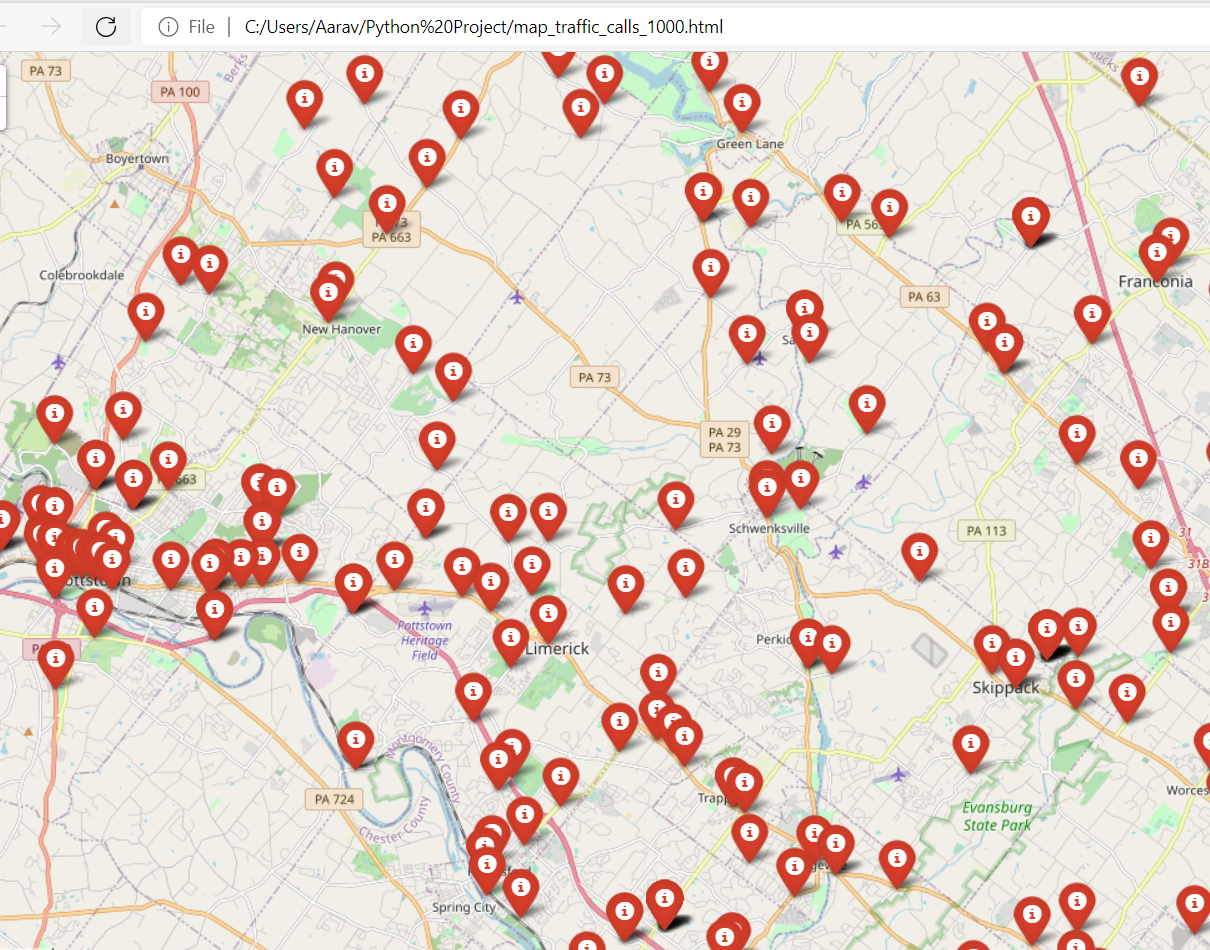

In [54]:
from IPython.display import Image
Image(filename='airports_nocalls.png')


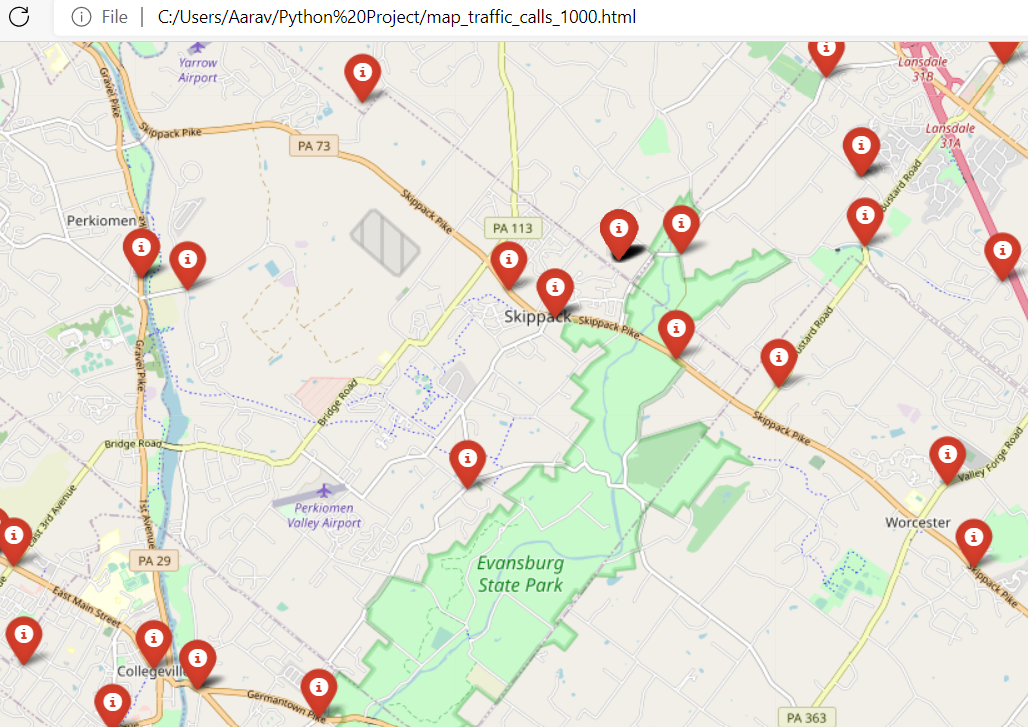

In [55]:
Image(filename='state_park.png')